In [1]:
# !pip install pyshp

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\da12\capstone and other projects\tornado-alley-capstone-da12\data\combined.csv", low_memory=False)

df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


#### Tornado Occurrences Through the Years in Tornado V/alley

In [4]:
tornado_alley_states = ['TEXAS', 'OKLAHOMA', 'KANSAS', 'NEBRASKA', 'SOUTH DAKOTA', 'MISSOURI', 'IOWA']

df_tornado_alley = df[df['STATE'].isin(tornado_alley_states)]
df_tornado_alley.head()


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
8,195009,15,1745,195009,15,1745,NaN,10099490,OKLAHOMA,40,...,0,NaN,NaN,35.00,-96.25,35.07,-96.17,NaN,NaN,PUB
9,195009,16,130,195009,16,130,NaN,10099491,OKLAHOMA,40,...,0,NaN,NaN,34.83,-95.85,NaN,NaN,NaN,NaN,PUB
10,195010,1,2100,195010,1,2100,NaN,10099492,OKLAHOMA,40,...,0,NaN,NaN,36.73,-102.52,36.88,-102.30,NaN,NaN,PUB


In [5]:
print(df[['BEGIN_LON', 'BEGIN_LAT']].dtypes)

BEGIN_LON    object
BEGIN_LAT    object
dtype: object


In [6]:
print(df[['BEGIN_TIME', 'BEGIN_YEARMONTH','END_TIME','BEGIN_DAY','END_YEARMONTH','END_TIME',]].dtypes)

BEGIN_TIME         object
BEGIN_YEARMONTH    object
END_TIME           object
BEGIN_DAY          object
END_YEARMONTH      object
END_TIME           object
dtype: object


In [7]:
df['BEGIN_LON'] = pd.to_numeric(df['BEGIN_LON'], errors='coerce')
df['BEGIN_LAT'] = pd.to_numeric(df['BEGIN_LAT'], errors='coerce')
df.dropna(subset=['BEGIN_LON', 'BEGIN_LAT'], inplace=True)


#### 1950s

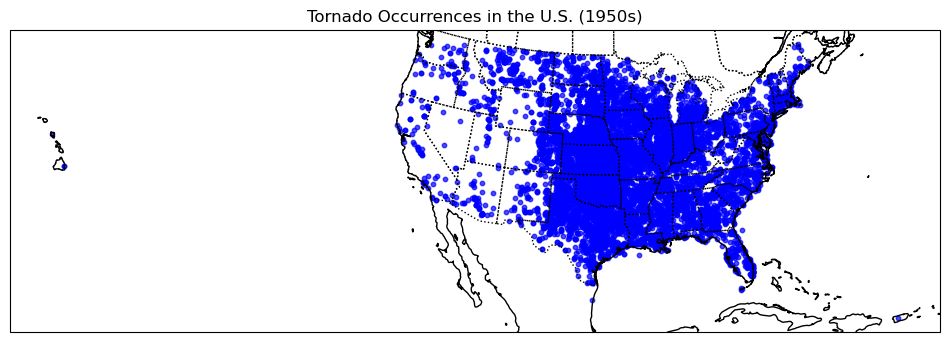

In [9]:
df['BEGIN_DATE'] = df['BEGIN_YEARMONTH'].astype(str) + df['BEGIN_DAY'].astype(str).str.zfill(2) + df['BEGIN_TIME'].astype(str).str.zfill(4)

df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'], format='%Y%m%d%H%M', errors='coerce')

df['year'] = df['BEGIN_DATE'].dt.year

df_1950s = df[(df['year'] >= 1950) & (df['year'] < 1960)]

lons_1950s = df_1950s['BEGIN_LON']
lats_1950s = df_1950s['BEGIN_LAT']

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle=':')

plt.scatter(lons_1950s, lats_1950s, color='blue', s=10, alpha=0.7, transform=ccrs.PlateCarree())

plt.title('Tornado Occurrences in the U.S. (1950s)')
plt.show()


#### Tornado Occurrence per State

In [11]:
state_tornado_50s = df_1950s['STATE'].value_counts()

print(state_tornado_50s.head(10))


STATE
TEXAS           1459
KANSAS          1193
OKLAHOMA        1107
NEBRASKA         659
MISSOURI         636
ILLINOIS         413
ARKANSAS         377
INDIANA          347
IOWA             297
SOUTH DAKOTA     292
Name: count, dtype: int64


#### 1960s

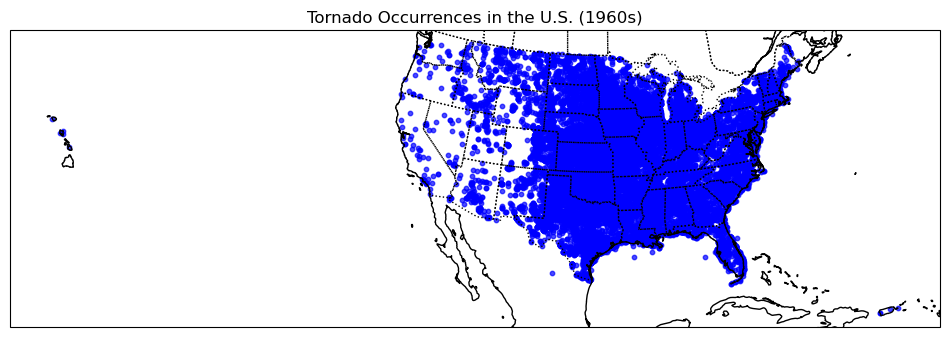

In [13]:
df['BEGIN_DATE'] = df['BEGIN_YEARMONTH'].astype(str) + df['BEGIN_DAY'].astype(str).str.zfill(2) + df['BEGIN_TIME'].astype(str).str.zfill(4)

df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'], format='%Y%m%d%H%M', errors='coerce')

df['year'] = df['BEGIN_DATE'].dt.year

df_1960s = df[(df['year'] >= 1960) & (df['year'] < 1970)]

lons_1960s = df_1960s['BEGIN_LON']
lats_1960s = df_1960s['BEGIN_LAT']

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle=':')

plt.scatter(lons_1960s, lats_1960s, color='blue', s=10, alpha=0.7, transform=ccrs.PlateCarree())

plt.title('Tornado Occurrences in the U.S. (1960s)')
plt.show()

In [14]:
state_tornado_60s = df_1960s['STATE'].value_counts()

print(state_tornado_60s.head(10))


STATE
TEXAS           3365
OKLAHOMA        2171
KANSAS          2013
MISSOURI        1363
NEBRASKA        1226
IOWA            1061
ILLINOIS         881
FLORIDA          769
MINNESOTA        752
SOUTH DAKOTA     711
Name: count, dtype: int64


In [15]:
latest_year = df['year'].max()

print(f"The latest year in the dataset is: {latest_year}")


The latest year in the dataset is: 2021


#### 2010s

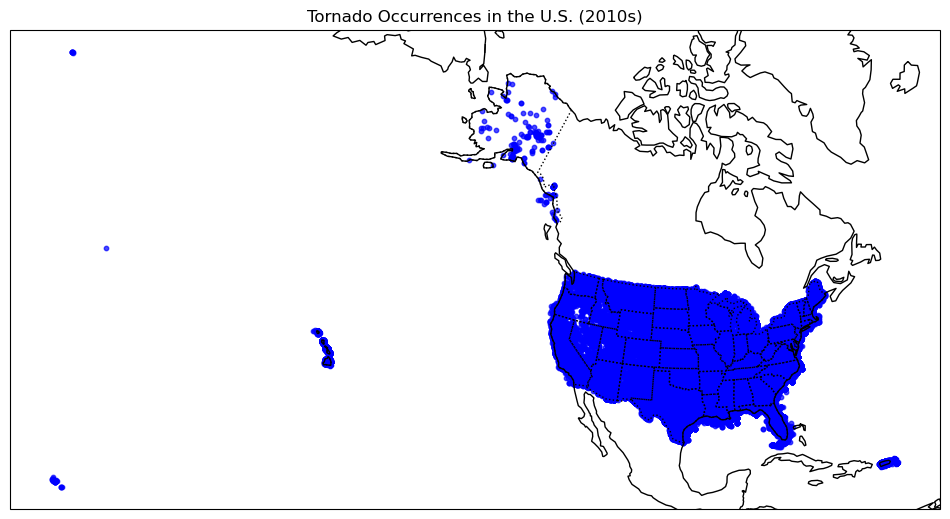

In [17]:
df['BEGIN_DATE'] = df['BEGIN_YEARMONTH'].astype(str) + df['BEGIN_DAY'].astype(str).str.zfill(2) + df['BEGIN_TIME'].astype(str).str.zfill(4)

df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'], format='%Y%m%d%H%M', errors='coerce')

df['year'] = df['BEGIN_DATE'].dt.year

df_2010s = df[(df['year'] >= 2010) & (df['year'] < 2020)]

lons_2010s = df_2010s['BEGIN_LON']
lats_2010s = df_2010s['BEGIN_LAT']

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.LambertConformal())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES, linestyle=':')

plt.scatter(lons_2010s, lats_2010s, color='blue', s=10, alpha=0.7, transform=ccrs.PlateCarree())

plt.title('Tornado Occurrences in the U.S. (2010s)')
plt.show()

In [18]:
state_tornado_10s = df_2010s['STATE'].value_counts()

print(state_tornado_10s.head(10))


STATE
TEXAS             26559
KANSAS            20039
IOWA              15959
MISSOURI          15662
VIRGINIA          13611
NEBRASKA          12904
KENTUCKY          12594
OKLAHOMA          12362
ILLINOIS          12352
NORTH CAROLINA    12096
Name: count, dtype: int64


#### Increase in Tornado Occurrences Over Time

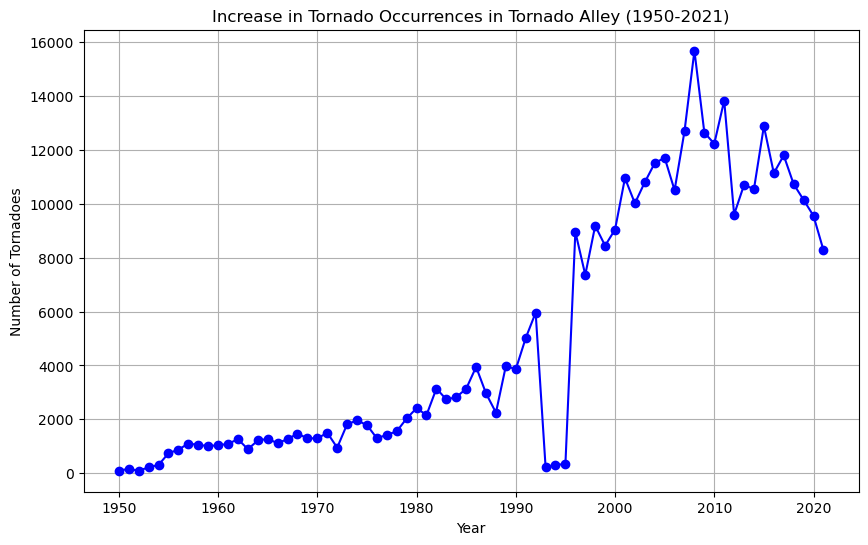

In [20]:
df_tornado_alley = df[df['STATE'].isin(tornado_alley_states) & df['year'].notnull()]

tornado_counts_by_year = df_tornado_alley.groupby('year').size()

years = pd.RangeIndex(start=1950, stop=2022)
tornado_counts_by_year = tornado_counts_by_year.reindex(years, fill_value=0)

plt.figure(figsize=(10, 6))
plt.plot(tornado_counts_by_year.index, tornado_counts_by_year.values, marker='o', linestyle='-', color='b')

plt.title('Increase in Tornado Occurrences in Tornado Alley (1950-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.grid(True)

plt.show()


In [21]:
df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,BEGIN_DATE,year
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB,1950-04-28 14:45:00,1950
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB,1950-04-29 15:30:00,1950
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB,1950-07-05 18:00:00,1950
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB,1950-07-05 18:30:00,1950
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB,1950-07-24 14:40:00,1950


#### Number of Most Powerful Tornadoes Over Time

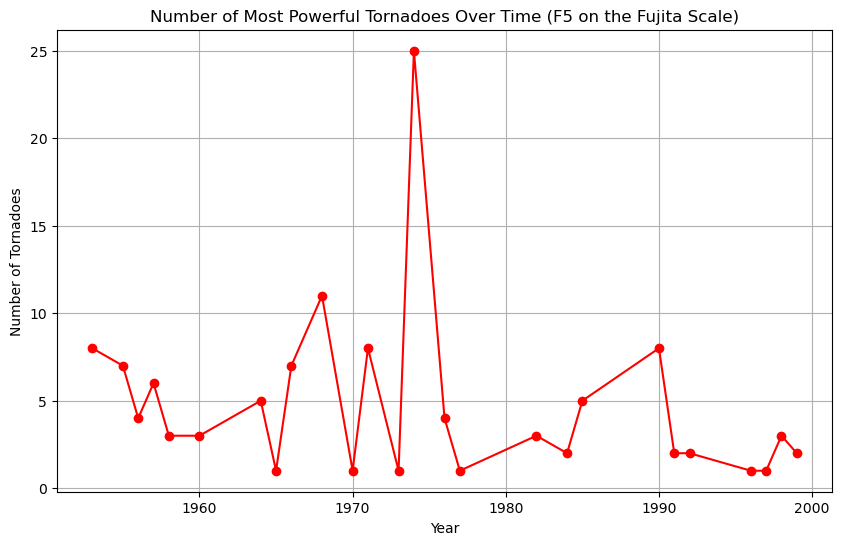

In [23]:
df_powerful = df[df['TOR_F_SCALE'].notnull()]

max_scale = df_powerful['TOR_F_SCALE'].max()

df_most_powerful = df_powerful[df_powerful['TOR_F_SCALE'] == max_scale]

tornadoes_by_year = df_most_powerful.groupby('year').size()

plt.figure(figsize=(10, 6))
plt.plot(tornadoes_by_year.index, tornadoes_by_year.values, marker='o', linestyle='-', color='r')

plt.title(f'Number of Most Powerful Tornadoes Over Time ({max_scale} on the Fujita Scale)')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.grid(True)

plt.show()

#### Tornado Locations Over Time

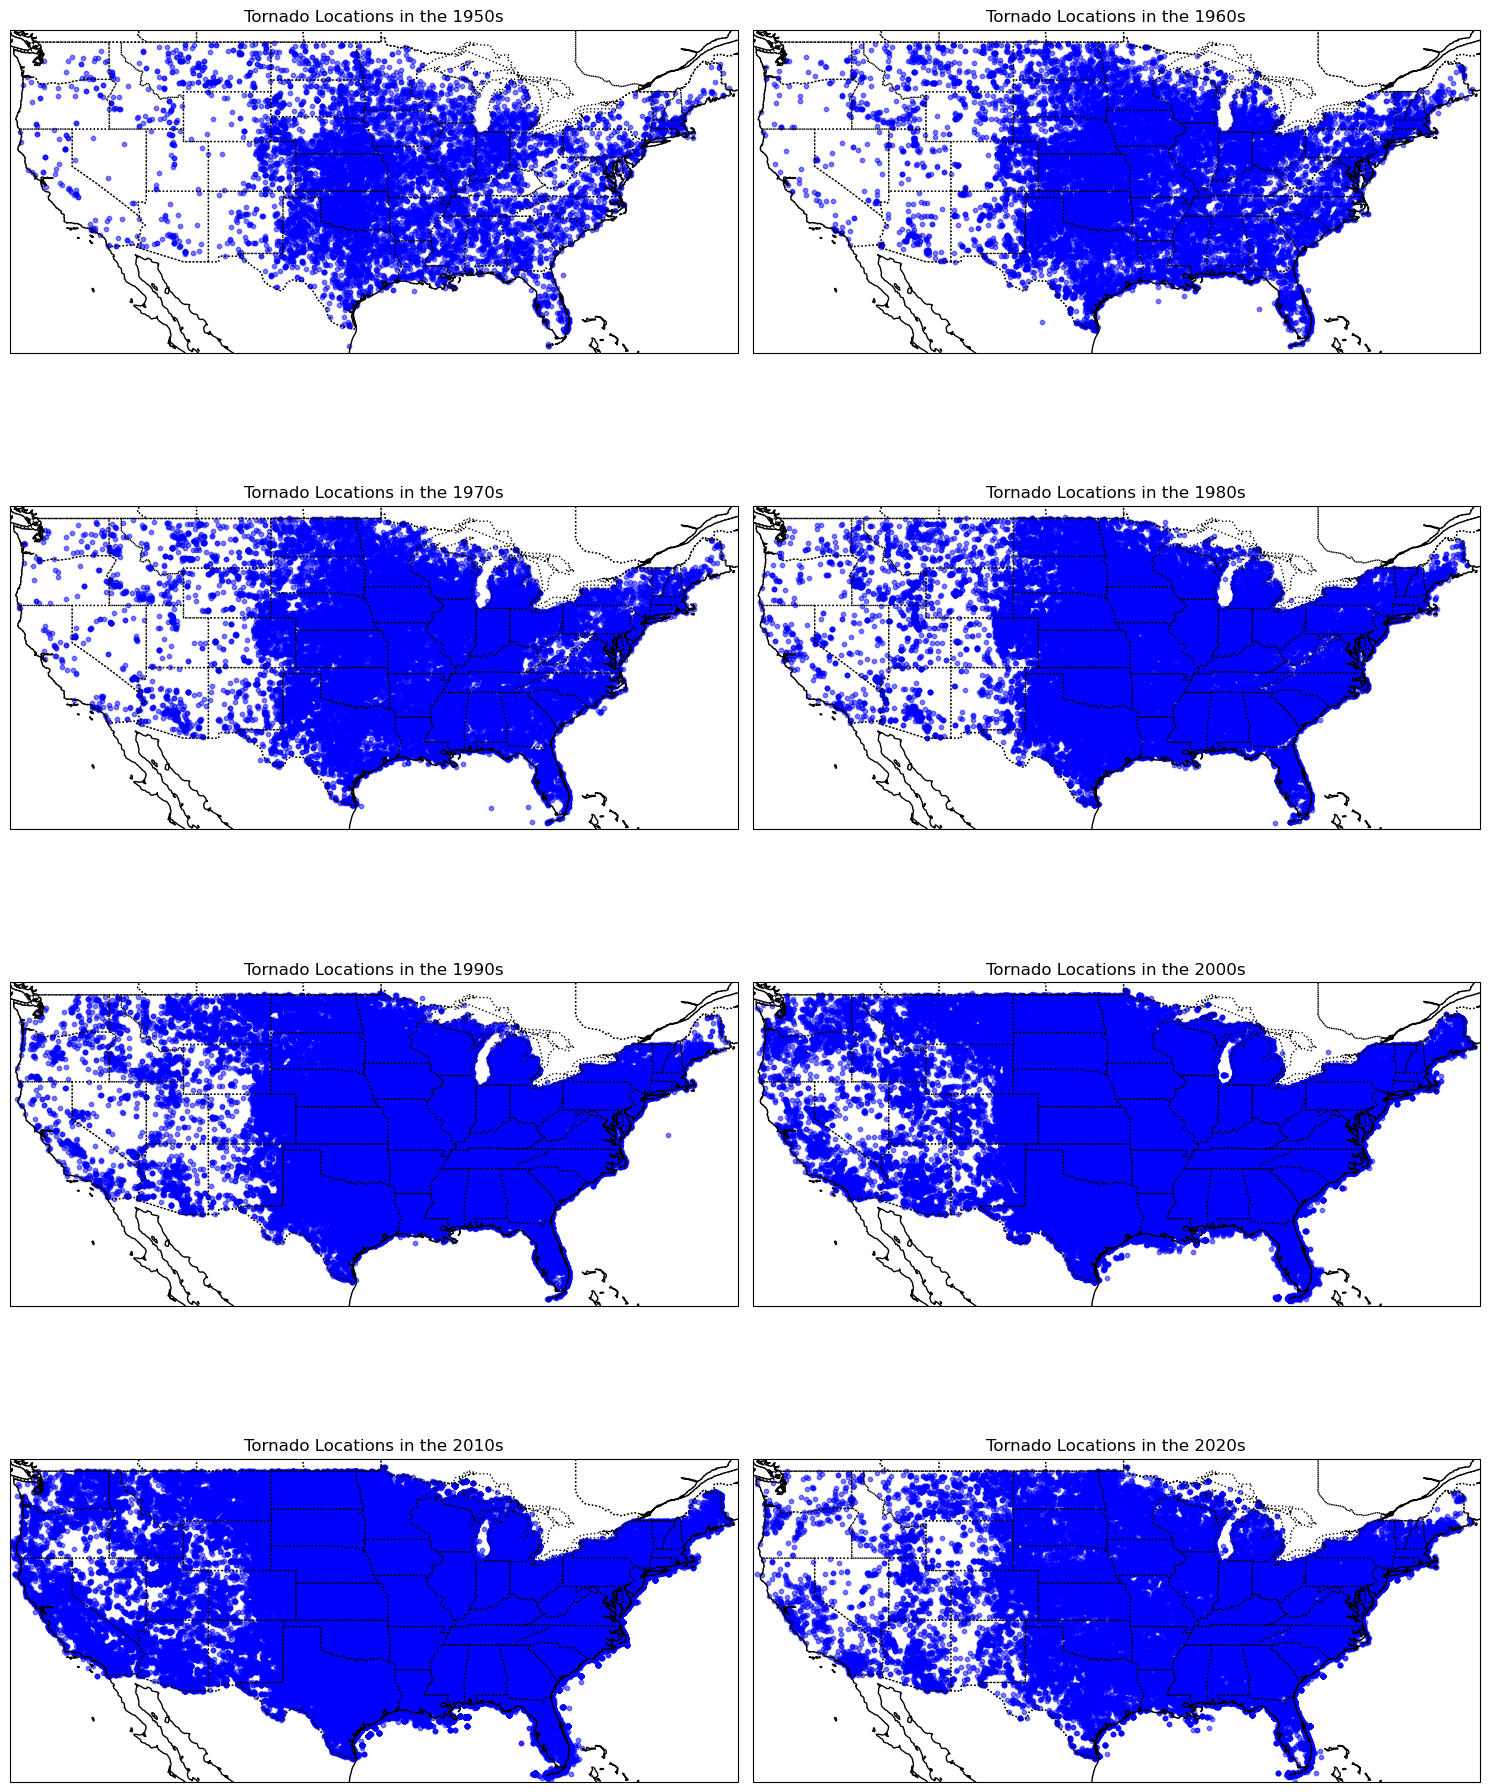

In [25]:
def classify_decade(year):
    return (year // 10) * 10

df['decade'] = df['year'].apply(classify_decade)

decades = sorted(df['decade'].unique())

fig, axes = plt.subplots(nrows=len(decades)//2, ncols=2, figsize=(15, 20), subplot_kw={'projection': ccrs.PlateCarree()})

axes = axes.flatten()

for i, decade in enumerate(decades):
    ax = axes[i]
    
    df_decade = df[df['decade'] == decade]
    
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES, linestyle=':')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    ax.set_extent([-125, -66.5, 24, 50], ccrs.PlateCarree())  # U.S. Lon and Lat
    
    ax.scatter(df_decade['BEGIN_LON'], df_decade['BEGIN_LAT'], color='blue', s=10, alpha=0.5, transform=ccrs.PlateCarree())
    
    ax.set_title(f'Tornado Locations in the {decade}s')

plt.tight_layout()

plt.show()

C:\Users\ericj\AppData\Local\Temp\ipykernel_16400\1771625535.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_powerful['decade'] = df_powerful['year'].apply(classify_decade)


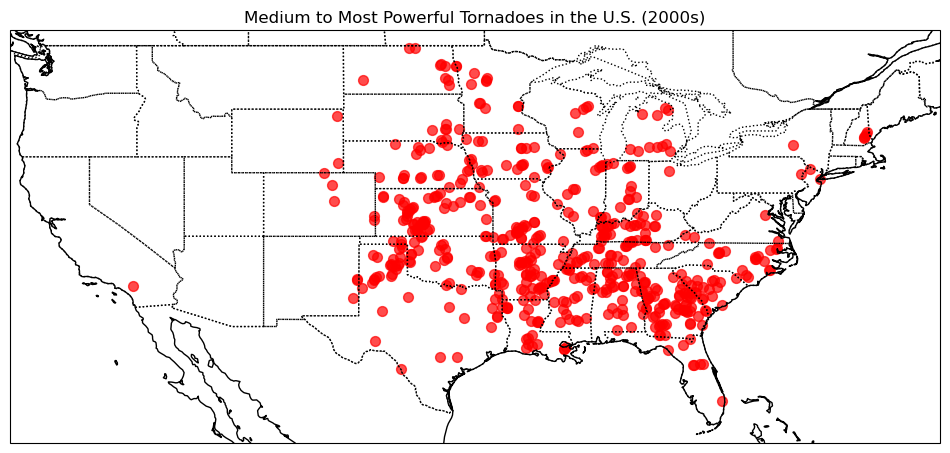

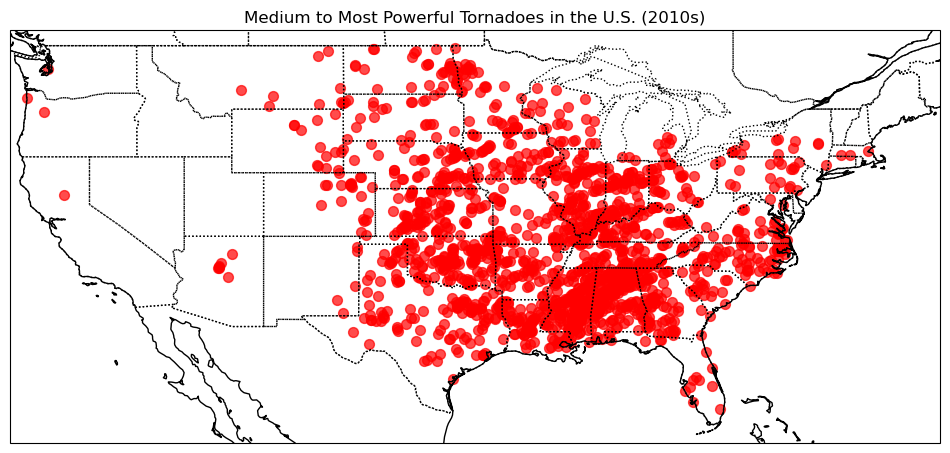

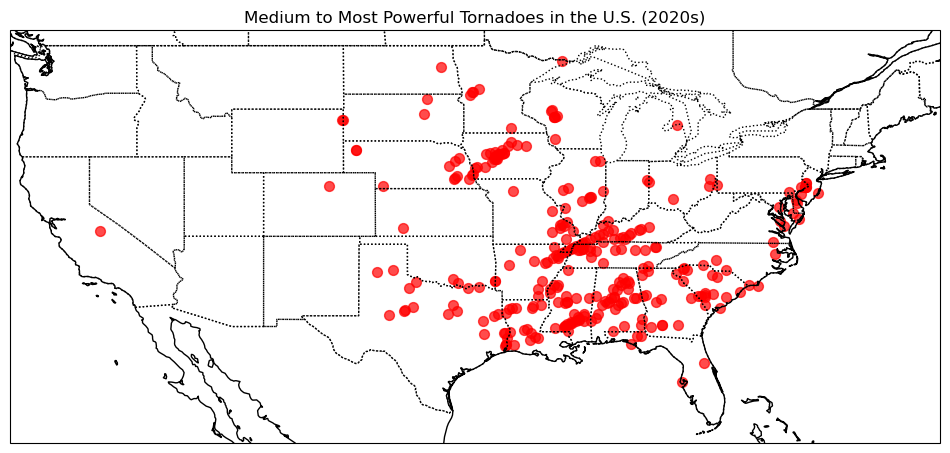

In [26]:
# medium to most powerful tornadoes- EF2 and above
powerful_tornadoes = ['EF2', 'EF3', 'EF4', 'EF5']  # Medium to most powerful tornadoes

df_powerful = df[df['TOR_F_SCALE'].isin(powerful_tornadoes) & df['BEGIN_LAT'].notnull() & df['BEGIN_LON'].notnull()]

def classify_decade(year):
    return (year // 10) * 10

df_powerful['decade'] = df_powerful['year'].apply(classify_decade)

for decade in sorted(df_powerful['decade'].unique()):
    df_decade = df_powerful[df_powerful['decade'] == decade]
    
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')
    
    ax.set_extent([-125, -66.5, 24, 50], ccrs.PlateCarree())  # Longitude and Latitude bounds for the U.S.

    plt.scatter(df_decade['BEGIN_LON'], df_decade['BEGIN_LAT'], color='red', s=50, alpha=0.7, transform=ccrs.PlateCarree())
    
    plt.title(f'Medium to Most Powerful Tornadoes in the U.S. ({decade}s)')
    
    plt.show()

#### Important- Centroid Shift

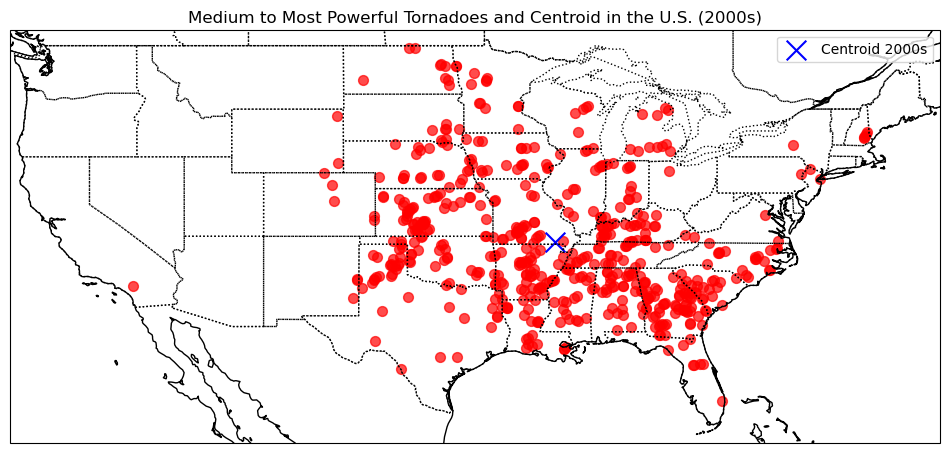

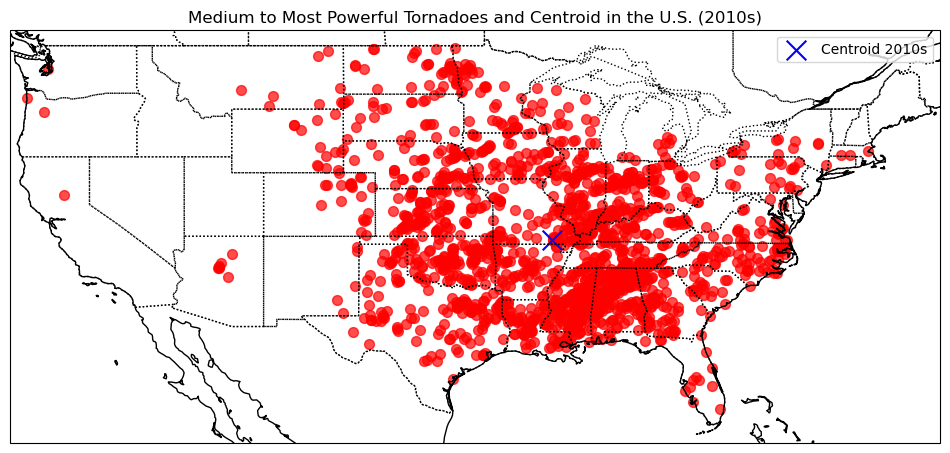

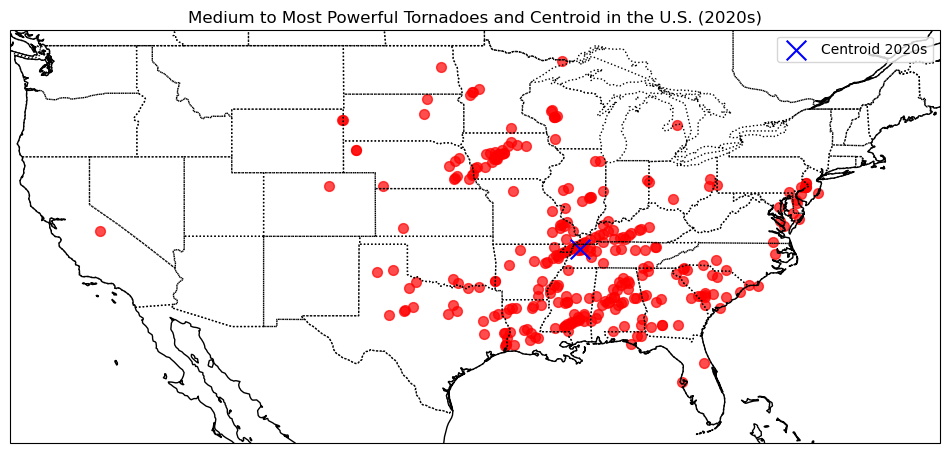

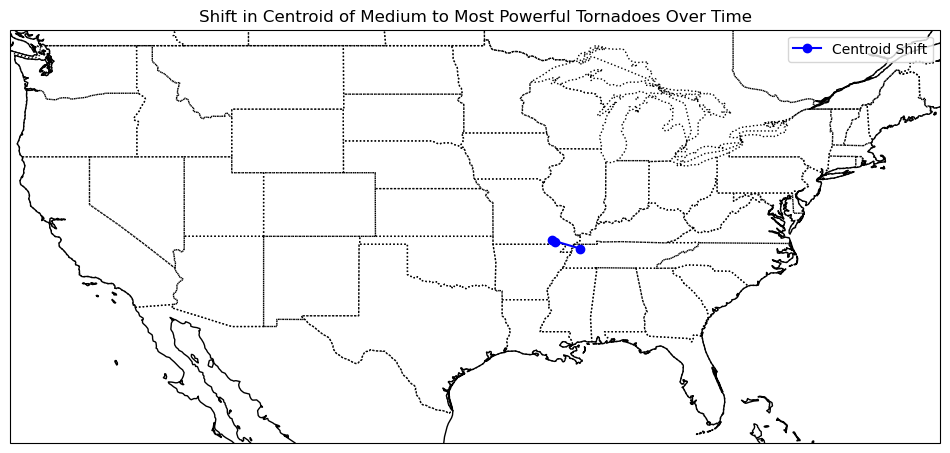

In [28]:

def calculate_centroid(lats, lons):
    return np.mean(lats), np.mean(lons)

centroid_lats = []
centroid_lons = []

for decade in sorted(df_powerful['decade'].unique()):
    df_decade = df_powerful[df_powerful['decade'] == decade]
    
    centroid_lat, centroid_lon = calculate_centroid(df_decade['BEGIN_LAT'], df_decade['BEGIN_LON'])
    centroid_lats.append(centroid_lat)
    centroid_lons.append(centroid_lon)
    
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES, linestyle=':')
    
    ax.set_extent([-125, -66.5, 24, 50], ccrs.PlateCarree())
    
    plt.scatter(df_decade['BEGIN_LON'], df_decade['BEGIN_LAT'], color='red', s=50, alpha=0.7, transform=ccrs.PlateCarree())
    
    plt.scatter(centroid_lon, centroid_lat, color='blue', s=200, marker='x', transform=ccrs.PlateCarree(), label=f'Centroid {decade}s')

    plt.title(f'Medium to Most Powerful Tornadoes and Centroid in the U.S. ({decade}s)')
    plt.legend()
    plt.show()

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

ax.set_extent([-125, -66.5, 24, 50], ccrs.PlateCarree())

plt.plot(centroid_lons, centroid_lats, marker='o', linestyle='-', color='blue', transform=ccrs.PlateCarree(), label='Centroid Shift')

plt.title('Shift in Centroid of Medium to Most Powerful Tornadoes Over Time')
plt.legend()
plt.show()

In [29]:
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df['5_year_interval'] = (df['YEAR'] // 5) * 5
df['5_year_range'] = df['5_year_interval'].astype(str) + '-' + (df['5_year_interval'] + 4).astype(str)
print(df[['YEAR', '5_year_interval', '5_year_range']].head())


   YEAR  5_year_interval 5_year_range
0  1950             1950    1950-1954
1  1950             1950    1950-1954
2  1950             1950    1950-1954
3  1950             1950    1950-1954
4  1950             1950    1950-1954


<Figure size 1000x600 with 0 Axes>

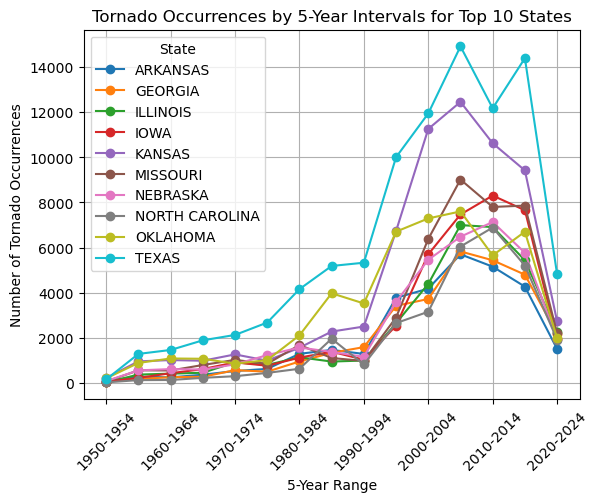

In [30]:
state_5yr_counts = df.groupby(['STATE', '5_year_range']).size().reset_index(name='count')

top_states = state_5yr_counts.groupby('STATE')['count'].sum().nlargest(10).index

# Filtering the DataFrame to show only the top 10 states
top_states_data = state_5yr_counts[state_5yr_counts['STATE'].isin(top_states)]


pivot_df = top_states_data.pivot(index='5_year_range', columns='STATE', values='count')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='line', marker='o')

plt.title('Tornado Occurrences by 5-Year Intervals for Top 10 States')
plt.xlabel('5-Year Range')
plt.ylabel('Number of Tornado Occurrences')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.grid(True)

plt.show()

In [31]:
df_2017 = df[df['year'] == 2017] 
df_2017.head(10)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,BEGIN_DATE,year,decade,5_year_interval,5_year_range
1415028,201704,6,1509,201704,6,1509,113355,678791,NEW JERSEY,34,...,39.66,-75.08,Low pressure tracked from the Ohio Valley into...,A couple of trees were taken down due to thund...,CSV,2017-04-06 15:09:00,2017,2010,2015,2015-2019
1415029,201704,6,930,201704,6,940,113459,679228,FLORIDA,12,...,26.5339,-81.8836,A line of thunderstorms developed along a pref...,Emergency management reported and broadcast me...,CSV,2017-04-06 09:30:00,2017,2010,2015,2015-2019
1415030,201704,5,1749,201704,5,1753,113448,679268,OHIO,39,...,39.85,-83.99,Showers and thunderstorms developed ahead of a...,An entire tree was uprooted in a yard on Dayto...,CSV,2017-04-05 17:49:00,2017,2010,2015,2015-2019
1415031,201704,16,1759,201704,16,1900,113697,682042,OHIO,39,...,39.1061,-84.2874,Thunderstorms with very heavy rain developed a...,Garage of a home was flooded by high water.,CSV,2017-04-16 17:59:00,2017,2010,2015,2015-2019
1415032,201704,15,1550,201704,15,1550,113683,682062,NEBRASKA,31,...,40.98,-95.89,An upper level storm system moved into Nebrask...,NaN,CSV,2017-04-15 15:50:00,2017,2010,2015,2015-2019
1415033,201704,29,915,201704,29,1115,114718,688082,INDIANA,18,...,38.7465,-85.0766,Thunderstorms trained along a warm front that ...,A road was closed and water was reported in th...,CSV,2017-04-29 09:15:00,2017,2010,2015,2015-2019
1415034,201704,21,1915,201704,21,1915,114834,688895,VIRGINIA,51,...,38.07,-76.54,Scattered severe thunderstorms in advance of a...,Numerous trees were downed around Sandy Point.,CSV,2017-04-21 19:15:00,2017,2010,2015,2015-2019
1415035,201710,22,1015,201710,22,1015,121068,724772,GULF OF MEXICO,85,...,29.12,-91.87,A pre-frontal trough moved across the coastal ...,A wind gust of 48 MPH was recorded at KSCF.,CSV,2017-10-22 10:15:00,2017,2010,2015,2015-2019
1415036,201704,29,945,201704,29,1145,114489,686560,OHIO,39,...,39.1973,-84.139,Thunderstorms trained along a warm front that ...,High water resulted in a road closure near the...,CSV,2017-04-29 09:45:00,2017,2010,2015,2015-2019
1415037,201704,15,1855,201704,15,1855,113683,682156,NEBRASKA,31,...,41.84,-96.52,An upper level storm system moved into Nebrask...,Two center pivot irrigation systems were repor...,CSV,2017-04-15 18:55:00,2017,2010,2015,2015-2019


In [32]:
df.info

<bound method DataFrame.info of         BEGIN_YEARMONTH BEGIN_DAY BEGIN_TIME END_YEARMONTH END_DAY END_TIME  \
0                195004        28       1445        195004      28     1445   
1                195004        29       1530        195004      29     1530   
2                195007         5       1800        195007       5     1800   
3                195007         5       1830        195007       5     1830   
4                195007        24       1440        195007      24     1440   
...                 ...       ...        ...           ...     ...      ...   
1723941          202106        13         29        202106      13       29   
1723949          202112        11       1811        202112      11     1811   
1723950          202112        11       1826        202112      11     1826   
1723952          202112        11       1755        202112      11     1755   
1723953          202112        11       1620        202112      11     1640   

        EPISODE_ID 

In [57]:
def convert_to_time(time_str):
    time_str = time_str.zfill(4)
    hour = int(time_str[:2])
    minute = time_str[2:]
    
    if hour == 0:
        return f"12:{minute} AM"
    elif hour < 12:
        return f"{hour}:{minute} AM"
    elif hour == 12:
        return f"12:{minute} PM"
    else:
        return f"{hour - 12}:{minute} PM"

# Apply the conversion function to the BEGIN_TIME column to create the "time" column
df['time'] = df['BEGIN_TIME'].astype(str).apply(convert_to_time)

# Display the first few rows to verify
print(df[['BEGIN_TIME', 'time']].head())

  BEGIN_TIME     time
0       1445  2:45 PM
1       1530  3:30 PM
2       1800  6:00 PM
3       1830  6:30 PM
4       1440  2:40 PM


In [65]:
# making a stt column to align with mission assignments
state_abbreviations = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR', 'CALIFORNIA': 'CA',
    'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'FLORIDA': 'FL', 'GEORGIA': 'GA',
    'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA', 'KANSAS': 'KS',
    'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD', 'MASSACHUSETTS': 'MA',
    'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 'MISSOURI': 'MO', 'MONTANA': 'MT',
    'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ', 'NEW MEXICO': 'NM',
    'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND', 'OHIO': 'OH', 'OKLAHOMA': 'OK',
    'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI', 'SOUTH CAROLINA': 'SC',
    'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT', 'VERMONT': 'VT',
    'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV', 'WISCONSIN': 'WI', 'WYOMING': 'WY'
}

df['stt'] = df['STATE'].map(state_abbreviations)
print(df[['STATE', 'stt']].head())

          STATE stt
0      OKLAHOMA  OK
1         TEXAS  TX
2  PENNSYLVANIA  PA
3  PENNSYLVANIA  PA
4  PENNSYLVANIA  PA


In [69]:
df['month'] = df['BEGIN_YEARMONTH'].astype(str).str[-2:]
print(df[['BEGIN_YEARMONTH', 'month','year','time','stt','BEGIN_DAY']].head())


  BEGIN_YEARMONTH month  year     time stt BEGIN_DAY
0          195004    04  1950  2:45 PM  OK        28
1          195004    04  1950  3:30 PM  TX        29
2          195007    07  1950  6:00 PM  PA         5
3          195007    07  1950  6:30 PM  PA         5
4          195007    07  1950  2:40 PM  PA        24


In [87]:
df.head(30)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,BEGIN_DATE,year,decade,5_year_interval,5_year_range,time,month,stt,combined,datetime
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,1950-04-28 14:45:00,1950,1950,1950,1950-1954,2:45 PM,04,OK,1950-04-28 2:45 PM,1950-04-28 14:45:00
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,1950-04-29 15:30:00,1950,1950,1950,1950-1954,3:30 PM,04,TX,1950-04-29 3:30 PM,1950-04-29 15:30:00
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,1950-07-05 18:00:00,1950,1950,1950,1950-1954,6:00 PM,07,PA,1950-07-5 6:00 PM,1950-07-05 18:00:00
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,1950-07-05 18:30:00,1950,1950,1950,1950-1954,6:30 PM,07,PA,1950-07-5 6:30 PM,1950-07-05 18:30:00
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,1950-07-24 14:40:00,1950,1950,1950,1950-1954,2:40 PM,07,PA,1950-07-24 2:40 PM,1950-07-24 14:40:00
5,195008,29,1600,195008,29,1600,NaN,10104930,PENNSYLVANIA,42,...,1950-08-29 16:00:00,1950,1950,1950,1950-1954,4:00 PM,08,PA,1950-08-29 4:00 PM,1950-08-29 16:00:00
6,195011,4,1700,195011,4,1700,NaN,10104931,PENNSYLVANIA,42,...,1950-11-04 17:00:00,1950,1950,1950,1950-1954,5:00 PM,11,PA,1950-11-4 5:00 PM,1950-11-04 17:00:00
7,195011,4,1730,195011,4,1730,NaN,10104932,PENNSYLVANIA,42,...,1950-11-04 17:30:00,1950,1950,1950,1950-1954,5:30 PM,11,PA,1950-11-4 5:30 PM,1950-11-04 17:30:00
8,195009,15,1745,195009,15,1745,NaN,10099490,OKLAHOMA,40,...,1950-09-15 17:45:00,1950,1950,1950,1950-1954,5:45 PM,09,OK,1950-09-15 5:45 PM,1950-09-15 17:45:00
9,195009,16,130,195009,16,130,NaN,10099491,OKLAHOMA,40,...,1950-09-16 01:30:00,1950,1950,1950,1950-1954,1:30 AM,09,OK,1950-09-16 1:30 AM,1950-09-16 01:30:00


In [83]:
df.dtypes

BEGIN_YEARMONTH            object
BEGIN_DAY                  object
BEGIN_TIME                 object
END_YEARMONTH              object
END_DAY                    object
                        ...      
time                       object
month                      object
stt                        object
combined                   object
datetime           datetime64[ns]
Length: 61, dtype: object

In [85]:
df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'], errors='coerce')

In [89]:
df.dtypes

BEGIN_YEARMONTH            object
BEGIN_DAY                  object
BEGIN_TIME                 object
END_YEARMONTH              object
END_DAY                    object
                        ...      
time                       object
month                      object
stt                        object
combined                   object
datetime           datetime64[ns]
Length: 61, dtype: object

In [91]:
df.to_csv(r"C:\da12\capstone and other projects\tornado-alley-capstone-da12\data\tornado_new_clean2.csv", index=False)

In [93]:
df.info

<bound method DataFrame.info of         BEGIN_YEARMONTH BEGIN_DAY BEGIN_TIME END_YEARMONTH END_DAY END_TIME  \
0                195004        28       1445        195004      28     1445   
1                195004        29       1530        195004      29     1530   
2                195007         5       1800        195007       5     1800   
3                195007         5       1830        195007       5     1830   
4                195007        24       1440        195007      24     1440   
...                 ...       ...        ...           ...     ...      ...   
1723941          202106        13         29        202106      13       29   
1723949          202112        11       1811        202112      11     1811   
1723950          202112        11       1826        202112      11     1826   
1723952          202112        11       1755        202112      11     1755   
1723953          202112        11       1620        202112      11     1640   

        EPISODE_ID 

In [95]:
dds_df['incidentId'] = dds_df['incidentId'].astype(str)


NameError: name 'dds_df' is not defined